# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Pre-process Data

In [2]:
df = pd.read_csv('ExtroVsIntro.csv')

In [3]:
# Number of rows and columns in the DataFrame
df.shape

# Statistical measurements of the DataFrame
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,4.452381,0.482993,3.933774,3.023009,0.483593,6.278912,3.560624,0.480392
std,3.430728,0.499761,2.874991,2.233173,0.499781,4.275091,2.883958,0.499665
min,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,4.000000,3.000000,0.000000,5.000000,3.000000,0.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,12.000000,1.000000,11.000000,8.000000,1.000000,16.000000,11.000000,1.000000


In [4]:
df['Personality'].value_counts()

Personality
0    2597
1    2401
Name: count, dtype: int64

In [5]:
df.groupby('Personality').mean()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
Personality,,,,,,,
0,2.125144,0.074317,5.911051,4.623412,0.074317,9.134001,5.572969
1,6.969596,0.925031,1.795085,1.291962,0.926281,3.190754,1.384007


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Test Train Split

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, train_X.shape, test_X.shape)

print("Training set size:", len(train_X))
print("Test set size:", len(test_X))      


(4998, 7) (3998, 7) (1000, 7)
Training set size: 3998
Test set size: 1000


# ML - Model - Linear Regression
Better for binary classification.

In [8]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [9]:
# Model Evaluation

# Accuracy on the training set
train_X_prediction = model.predict(train_X)
train_X_accuracy = accuracy_score(train_X_prediction, train_y) # train_X features, train_y labels (what we want to predict)
print("Model accuracy on training data:", train_X_accuracy) 

# Accuracy on the test set
test_X_prediction = model.predict(test_X)
test_X_accuracy = accuracy_score(test_X_prediction, test_y)
print("Model accuracy on test data:", test_X_accuracy)


Model accuracy on training data: 0.9277138569284642
Model accuracy on test data: 0.916


# Making a Predicitive System based off the trained model.

In [10]:
input_data = (-0.0,0,5.0,4.0,0,11.0,3.0)  # Example input data

# Input data needs to be converted into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Precdicting using the trained model
prediction = model.predict(input_data_reshaped)
print("Prediction:", prediction)

if prediction[0] == 1:
    print("The person is an Introvert")
else:
    print("The person is an Extrovert")

Prediction: [0]
The person is an Extrovert


/Users/eyad/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Visualisation

In [11]:
import ipywidgets 
import matplotlib.pyplot as plt

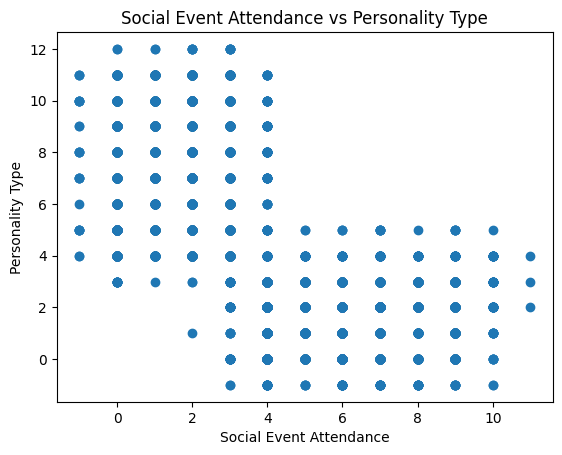

In [12]:
plt.scatter(df['Social_event_attendance'], X.iloc[:, 0])

plt.xlabel('Social Event Attendance')
plt.ylabel('Personality Type')
plt.title('Social Event Attendance vs Personality Type')
plt.show()

# User Interaction

In [31]:
import ipywidgets as widgets
from ipywidgets import Output
from IPython.display import display

output = Output()
display(output)

# Create widgets
Time_spent_Alone = widgets.FloatSlider(description='Time Alone', min=0, max=10, step=0.5, value=2.0)
Stage_fear = widgets.ToggleButtons(description='Stage Fear', options=[('No', 0), ('Yes', 1)], value=0)
Social_event_attendance = widgets.FloatSlider(description='Social Events', min=0, max=10, step=1, value=4.0)
Going_outside = widgets.FloatSlider(description='Going Out', min=0, max=10, step=1, value=5.0)
Drained_after_socializing = widgets.ToggleButtons(description='Drained?', options=[('No', 0), ('Yes', 1)], value=0)
Friends_circle_size = widgets.FloatSlider(description='Friends', min=0, max=20, step=1, value=10.0)
Post_frequency = widgets.FloatSlider(description='Post Freq', min=0, max=10, step=1, value=3.0)
predict_button = widgets.Button(description="Predict Personality")

# Display widgets
display(Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside,
        Drained_after_socializing, Friends_circle_size, Post_frequency, predict_button)    


def on_predict_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output on every click
        # Collect user input

        # We need to make it into a datafram for our model
        columns = [
        "Time_spent_Alone",
        "Stage_fear",
        "Social_event_attendance",
        "Going_outside",
        "Drained_after_socializing",
        "Friends_circle_size",
        "Post_frequency"
        ]

        user_data = pd.DataFrame([[
        Time_spent_Alone.value,
        Stage_fear.value,
        Social_event_attendance.value,
        Going_outside.value,
        Drained_after_socializing.value,
        Friends_circle_size.value,
        Post_frequency.value
        ]], columns=columns)

        prediction = model.predict(user_data)
        result = "You are an extrovert" if prediction[0] == 0 else "You are an introvert"
        print(f"\nPrediction: {result}")

# Bind button
predict_button.on_click(on_predict_button_clicked)


Output()

FloatSlider(value=2.0, description='Time Alone', max=10.0, step=0.5)

ToggleButtons(description='Stage Fear', options=(('No', 0), ('Yes', 1)), value=0)

FloatSlider(value=4.0, description='Social Events', max=10.0, step=1.0)

FloatSlider(value=5.0, description='Going Out', max=10.0, step=1.0)

ToggleButtons(description='Drained?', options=(('No', 0), ('Yes', 1)), value=0)

FloatSlider(value=10.0, description='Friends', max=20.0, step=1.0)

FloatSlider(value=3.0, description='Post Freq', max=10.0, step=1.0)

Button(description='Predict Personality', style=ButtonStyle())